# ANN to Predict a Single Emotion
Using modal representation, can we imrprove on Santamaria-Granados, Luz, et al. "Using deep convolutional neural network for emotion detection on a physiological signals dataset (AMIGOS)." IEEE Access 7 (2018): 57-67.

Another step forward from fingerprints, single subject??

Setup: Javascript and ipynb stuff

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('autosavetime/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

## Load Functions

In [3]:
from fastai.vision import *
import os
import numpy as np
import pandas as pd
import pickle
import warnings; warnings.simplefilter('ignore')

In [4]:
path=pathlib.Path('/home/tris/Documents/EEG_data/DMD_DEAP')
path

PosixPath('/home/tris/Documents/EEG_data/DMD_DEAP')

## Load Original Data Labels

In [5]:
path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [6]:
df=df.div(9) #normalize
df.head()

,valence,arousal,dominance,liking
0,0.856667,0.844444,0.766667,0.870000
1,0.900000,0.812222,0.808889,0.941111
2,0.953333,0.837778,1.000000,0.786667
3,0.548889,0.667778,0.680000,0.895556
4,0.773333,0.435556,0.798889,0.672222


## Set filenames and labels

In [7]:
filenames=[]
subject_labels=[]
for n in range (0,9):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
for n in range (9,32):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,40):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
df['file_name']=filenames
df['subject_label']=subject_labels
df=df[['file_name','subject_label','valence','arousal']]
df.tail()

,file_name,subject_label,valence,arousal
1275,S32T36,32,0.434444,0.773333
1276,S32T37,32,0.312222,0.681111
1277,S32T38,32,0.338889,0.778889
1278,S32T39,32,0.443333,0.796667
1279,S32T40,32,0.794444,0.447778


In [8]:
# for i in range(1,33):
#     for ii in range(1,41):
#         os.rename(r'/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps/T'+str(ii)+'S'+str(i)+".png",r'/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps/S'+str(i)+'T'+str(ii)+".png")

In [9]:
# from PIL import Image

# for i in range (0,1280):
    
#     im = Image.open(r"/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps/"+str(df.file_name[i])+".png")
#     im1=im.crop((0,0,1450,1030))
#     im1.save("/media/tris/tris_files/github/OoMA-omniscient/data/processed/heatmaps_ind/heatmaps_re/"+str(df.file_name[i])+".png")

In [11]:
# df.loc[(df['valence'] >= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 0  #HVHA
# df.loc[(df['valence'] <= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 1  #LVHA
# df.loc[(df['valence'] <= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 2 #LVLA  
# df.loc[(df['valence'] >= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 3  #HVLA
# df.head()

In [12]:
df.loc[(df['valence'] >= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 'HVHA'  #HVHA
df.loc[(df['valence'] <= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 'LVHA'  #LVHA
df.loc[(df['valence'] <= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 'LVLA' #LVLA  
df.loc[(df['valence'] >= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 'HVLA'  #HVLA
df.head()

,file_name,subject_label,valence,arousal,emotion_quad
0,S1T1,1,0.856667,0.844444,HVHA
1,S1T2,1,0.900000,0.812222,HVHA
2,S1T3,1,0.953333,0.837778,HVHA
3,S1T4,1,0.548889,0.667778,HVHA
4,S1T5,1,0.773333,0.435556,HVLA


In [13]:
df=df.tail(n=40);
df=df.reset_index(drop=True); df

,file_name,subject_label,valence,arousal,emotion_quad
0,S32T1,32,0.903333,0.536667,HVHA
1,S32T2,32,0.554444,0.332222,HVLA
2,S32T3,32,0.894444,0.787778,HVHA
3,S32T4,32,0.773333,0.571111,HVHA
4,S32T5,32,0.794444,0.660000,HVHA
5,S32T6,32,0.642222,0.443333,HVLA
6,S32T7,32,0.548889,0.454444,HVLA
7,S32T8,32,0.884444,0.673333,HVHA
8,S32T9,32,0.873333,0.463333,HVLA
9,S32T10,32,0.453333,0.661111,LVHA


![GitHub Logo](https://www.researchgate.net/profile/Fadi_Al_Machot/publication/307587787/figure/fig3/AS:572907778318337@1513603266552/Arousal-valence-based-emotional-states.png)

In [14]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/DMD')
path

PosixPath('/media/tris/tris_files/EEG_datasets/DMD')

In [15]:
df.to_csv(path/'labels_proc_S32.csv', index=False)

In [16]:
df = pd.read_csv(path/'labels_proc_S32.csv') #load labels
df.tail()

,file_name,subject_label,valence,arousal,emotion_quad
35,S32T36,32,0.434444,0.773333,LVHA
36,S32T37,32,0.312222,0.681111,LVHA
37,S32T38,32,0.338889,0.778889,LVHA
38,S32T39,32,0.443333,0.796667,LVHA
39,S32T40,32,0.794444,0.447778,HVLA


## Data loader

In [17]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/DMD')
df = pd.read_csv(path/'labels_proc_S32.csv') #load labels
df.tail()

,file_name,subject_label,valence,arousal,emotion_quad
35,S32T36,32,0.434444,0.773333,LVHA
36,S32T37,32,0.312222,0.681111,LVHA
37,S32T38,32,0.338889,0.778889,LVHA
38,S32T39,32,0.443333,0.796667,LVHA
39,S32T40,32,0.794444,0.447778,HVLA


In [18]:
src = (ImageList.from_csv(path, 'labels_proc_S32.csv', folder='heatmaps_32ch', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['emotion_quad'],label_cls=CategoryList))

In [19]:
tfms=get_transforms()
tf_final=[[tfms[0][0],tfms[0][4],tfms[0][5],tfms[0][6]],None]

In [20]:
data = (src.transform(tf_final, size=300)
        .databunch(bs=4).normalize())

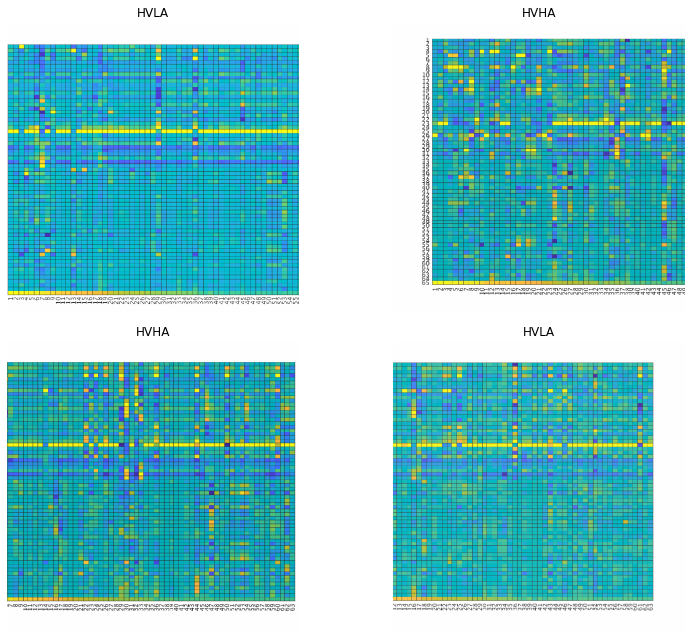

In [21]:
data.show_batch(rows=4, figsize=(12,9))

## Setup Network

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [23]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 150, 150]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 150, 150]       128        True      
______________________________________________________________________
ReLU                 [64, 150, 150]       0          False     
______________________________________________________________________
MaxPool2d            [64, 75, 75]         0          False     
______________________________________________________________________
Conv2d               [64, 75, 75]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 75, 75]         128        True      
______________________________________________________________________
ReLU                 [64, 75, 75]         0          False     
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


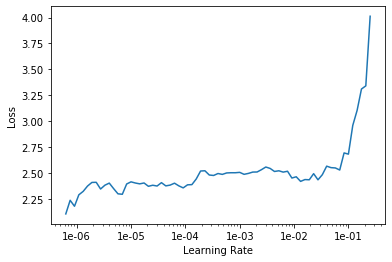

In [24]:
learn.lr_find()
learn.recorder.plot()

## Train last layers

In [25]:
lr = 3e-3
learn.fit_one_cycle(15, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,2.647697,1.881295,0.375000,00:01
1,2.224732,1.898948,0.375000,00:01
2,2.562729,1.890021,0.125000,00:01
3,2.664967,3.303202,0.125000,00:01
4,2.756179,2.260941,0.000000,00:01
5,2.637167,1.725367,0.375000,00:01
6,2.462075,1.697695,0.375000,00:01
7,2.458522,2.278487,0.375000,00:01
8,2.415721,2.257165,0.250000,00:01
9,2.284435,1.588786,0.375000,00:01


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f907e158350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f907da63fd0>]], dtype=object)

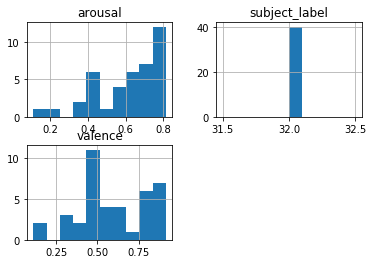

In [26]:
df.hist()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


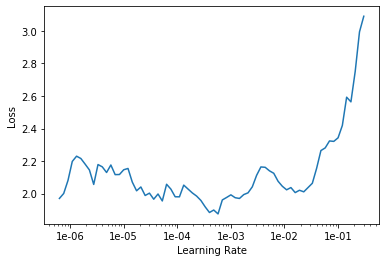

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
lr = 1e-3
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.868906,1.613985,0.375000,00:01
1,1.929604,1.545787,0.500000,00:01
2,2.198222,1.369689,0.500000,00:01
3,2.173949,1.208730,0.500000,00:01
4,2.079517,1.271654,0.500000,00:01


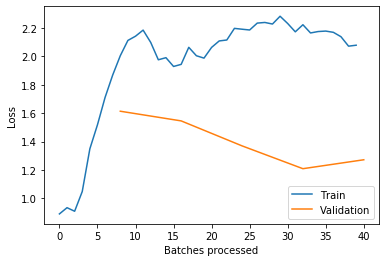

In [29]:
learn.recorder.plot_losses()

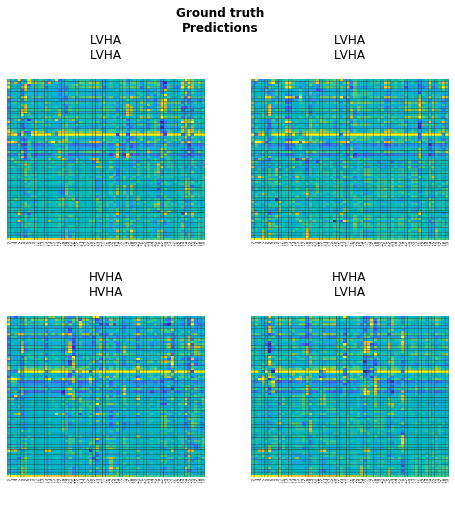

In [30]:
learn.show_results()

## Train the whole network

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


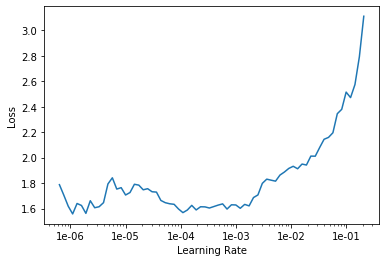

In [31]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [32]:
lr = 8e-5
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.807815,1.630187,0.375000,00:01
1,1.676662,1.387563,0.625000,00:01
2,1.621457,1.321064,0.625000,00:01
3,1.943245,0.972848,0.625000,00:01
4,1.913486,0.750973,0.750000,00:01
5,1.826307,0.906737,0.625000,00:01
6,1.901890,1.338966,0.500000,00:01
7,1.979837,1.188606,0.625000,00:01
8,2.076943,1.255541,0.625000,00:01
9,1.994418,1.119760,0.375000,00:01


## Interpret and Results

In [ ]:
learn.show_results()

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
interp.plot_top_losses(4)

In [ ]:
idx=5
x,y = data.valid_ds[idx]
x.show()

In [ ]:
m = learn.model.eval();
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [ ]:
from fastai.callbacks.hooks import *

In [ ]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [ ]:
hook_a,hook_g = hooked_backward()

In [ ]:
acts  = hook_a.stored[0].cpu()
acts.shape

In [ ]:
avg_acts = acts.mean(0)
avg_acts.shape

In [ ]:
def show_heatmap(hm,filename):
    _,ax = plt.subplots(figsize=(20,10))
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.7, extent=(0,200,200,0), #this is werid with resize...
              interpolation='bilinear', cmap='magma');
    plt.savefig(filename)

In [ ]:
# show_heatmap(avg_acts,'test.png')

In [ ]:
# for idx in range(0,200):
#     x,y = src.valid_ds[idx]
#     xb,_ = src.one_item(x)
#     xb_im = Image(src.denorm(xb)[0])
#     xb = xb.cuda()
#     hook_a,hook_g = hooked_backward()
#     acts  = hook_a.stored[0].cpu()
#     avg_acts = acts.mean(0)
#     filename='heatmap_'+str(idx)+'.png'
#     show_heatmap(avg_acts,filename)
    